In [14]:
import sys
sys.path.append('..')
from utils import *
sys.path.append('../attacks/')
from fgsm import *
sys.path.append('../models/')
from torch import nn,norm
import torch
from torchvision import transforms, datasets
import numpy as np
from tqdm import tqdm
import cv2
import pandas as pd
import numpy as np

In [2]:
imgs = datasets.ImageFolder('/home/hancy/dataset/imagenet3000/',transform=transforms.ToTensor())

In [3]:
wm = cv2.imread('../img/logo.jpg')
wm = cv2.cvtColor(wm,cv2.COLOR_BGR2RGB)

In [4]:
img = imgs[10][0]

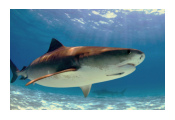

In [5]:
pltshow(img)

In [6]:
img = addborder(img,8)

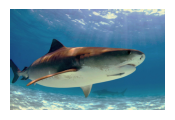

In [7]:
pltshow(img)

In [8]:
wm = transforms.ToTensor()(wm).cuda()

In [9]:
img = img.cuda()

In [10]:
wm = transforms.Resize(img.size()[-2:])(wm)

In [11]:
target = torch.tensor([imgs[10][1]]).cuda()

In [15]:
from alexnet import *

In [16]:
model = alexnet_IN().cuda()

In [12]:
block_size = 8
alpha = 0.1
beta = 5/255
l1 = 0.001
l2 = 0.001
s_a = 0.000005
s_b = 0.0001
N = 100
alpha_max = 0.2
beta_max = 8/255

In [ ]:
pred_label = model(img.unsqueeze(0)).argmax().item()
perd_img,wm_extracted,a_res,b_res = fgsm_wm_opti(img,target,wm,model,alpha,beta,block_size,N,l1,l2,s_a,s_b,alpha_max,beta_max)
res = model(perd_img.unsqueeze(0))
perd_label = res.argmax().item()

In [ ]:
filename = '/home/hancy/code/adv_wm/atk_result/fgsm_wm_cifar_resnet2210051536.txt'
check_result(filename)

In [ ]:
def attack_and_record(filename: str,model: nn.Module, imgs:datasets, wm: Tensor):
    block_size = 4
    alpha = 0.1
    beta = 5/255
    l1 = 0.001
    l2 = 0.001
    s_a = 0.000005
    s_b = 0.0001
    N = 10
    alpha_max = 0.2
    beta_max = 8/255
    with open(filename,'a') as file:
        for i in tqdm(range(len(imgs)), desc='Processing'):
            img = imgs[i][0].cuda()
            target = torch.tensor([imgs[i][1]]).cuda()
            pred_label = model(img.unsqueeze(0)).argmax().item()
            perd_img,wm_extracted,a_res,b_res = fgsm_wm_opti(img,target,wm,model,alpha,beta,block_size,N,l1,l2,s_a,s_b,alpha_max,beta_max)
            res = model(perd_img.unsqueeze(0))
            perd_label = res.argmax().item()
            wm_l2_norm = norm(wm_extracted-wm).item()
            img_l2_norm = norm(perd_img-img).item()
            file.write('{},{},{},{},{},{},{},{}\n'.format(i,imgs[i][1],pred_label,perd_label,wm_l2_norm,img_l2_norm,a_res,b_res))

In [ ]:
pltshow(perd_img)

In [ ]:
perd_img, wm_extracted, a_res, b_res = fgsm_wm_opti(img,target,wm,model,alpha,beta,block_size,N,l1,l2,s_a,s_b,beta_max)
res = model(perd_img.unsqueeze(0))
perd_label = res.argmax().item()

In [ ]:
pltshow(perd_img)

In [ ]:
def check_result(filename,direct_mode=False):
    cols = ['index','label','pred_label','perd_label','wm_l2','img_l2','alpha','beta']
    if(direct_mode):
        cols = ['index','label','pred_label','perd_label','wm_l2','img_l2']
    res = pd.read_csv(filename,names=cols,header=None)
    print((res['label'] == res['pred_label']).sum())
    print((res['label'] == res['perd_label']).sum())
    print(res['wm_l2'].sum() / res['wm_l2'].count())
    print(res['img_l2'].sum() / res['img_l2'].count())

In [ ]:
def attack_and_record_direct(filename: str,model: nn.Module, imgs:datasets, wm: Tensor):
    block_size = 4
    alpha = 0.1
    beta = 5/255
    with open(filename,'a') as file:
        for i in tqdm(range(len(imgs)), desc='Processing'):
            img = imgs[i][0].cuda()
            target = torch.tensor([imgs[i][1]]).cuda()
            pred_label = model(img.unsqueeze(0)).argmax().item()
            perd_img = fgm_direct(img,target,wm,model,alpha,beta,block_size)
            wm_extracted = extract_wm(img,perd_img,alpha,block_size)
            res = model(perd_img.unsqueeze(0))
            perd_label = res.argmax().item()
            wm_l2_norm = norm(wm_extracted-wm).item()
            img_l2_norm = norm(perd_img-img).item()
            file.write('{},{},{},{},{},{}\n'.format(i,imgs[i][1],pred_label,perd_label,wm_l2_norm,img_l2_norm))

In [ ]:
filename = '/home/hancy/code/adv_wm/atk_result/fgm_direct_cifar_alexnet2210041737.txt'
attack_and_record_direct(filename,model,imgs,wm)

In [ ]:
filename = '/home/hancy/code/adv_wm/atk_result/fgsm_wm_cifar_resnet2210051502.txt'
attack_and_record(filename,model,imgs,wm)

In [ ]:
check_result(filename)

In [ ]:
filename = '/home/hancy/code/adv_wm/atk_result/fgm_direct_cifar_alexnet2210041737.txt'
check_result(filename)

In [ ]:
filename = '/home/hancy/code/adv_wm/atk_result/fgsm_direct_cifar_alexnet2210011644.txt'
attack_and_record_direct(filename,model,imgs,wm)

In [ ]:
check_result(filename,True)

In [ ]:
direct_cols = ['index','label','pred_label','perd_label','wm_l2','img_l2']

In [ ]:
res = pd.read_csv(filename,names=direct_cols,header=None)
print((res['label'] == res['perd_label']).sum())
print(res['wm_l2'].sum() / res['wm_l2'].count())
print(res['img_l2'].sum() / res['img_l2'].count())

In [ ]:
check_result(filename,True)

In [ ]:
check_result(filename,False)